# 4f. Texte einlesen und aufbereiten

In diesem Notebook schließen wir die Datenbeschaffung ab und explorieren das Textkorpus der Brüder Grimm von 1857.

## Inhalte
- Wir lesen die Textdateien des Korpus mit dem PlaintextCorpusReader ein
- Wir explorieren das Korpus mit dem nltk.Text Objekt
- Wir bereinigen das Vokabular des Korpus in mehreren Schritten
- Exkurs: Wir testen den HanoverTagger zum Part of Speech Tagging

In [1]:
import pathlib

import nltk
from HanTa import HanoverTagger as ht

# prepare paths
DATA_DIR = pathlib.Path().cwd().parent.joinpath("data")
PROC_DATA_DIR = DATA_DIR.joinpath("processed")

# Prepare corpus reader
CORPUS_DIR = DATA_DIR.joinpath("corpus").joinpath("bruder-grimm_1857")
GERMAN_TOKENIZER = nltk.data.load("nltk:tokenizers/punkt/german.pickle")
fairytale_corpus_reader = nltk.corpus.PlaintextCorpusReader(
    root=str(CORPUS_DIR),
    fileids="[\w+-]*\.txt",
    sent_tokenizer=GERMAN_TOKENIZER,
)

## 1. Einlesen der Texte

In [2]:
fairytale_corpus_reader.words?

Signature: fairytale_corpus_reader.words(fileids=None)
Docstring:
:return: the given file(s) as a list of words
    and punctuation symbols.
:rtype: list(str)
File:      ~/.local/share/virtualenvs/2021-10-28_Textarbeit-mit-Python-oW_HKkNn/lib/python3.9/site-packages/nltk/corpus/reader/plaintext.py
Type:      method


In [3]:
# the method words() returns a list of all tokens (words and punctuation symbols in all files of the corpus
tokens = fairytale_corpus_reader.words()
tokens

['Es', 'war', 'einmal', 'ein', 'König', ',', 'der', ...]

In [4]:
# how many tokens are in the corpus?
len(tokens)

300945

In [5]:
# we create a nltk.Text object from the list of words
grimm_text = nltk.Text(tokens)
grimm_text

<Text: Es war einmal ein König , der hatte...>

In [6]:
# we explore the vocabulary
grimm_text.vocab()

FreqDist({',': 22616, 'und': 11984, '.': 7057, '„': 6084, 'der': 5942, 'die': 5611, 'er': 4669, 'sie': 4235, 'das': 3372, 'den': 3255, ...})

In [7]:
# how many unique tokens are in the vocabulary?
len(grimm_text.vocab())

17086

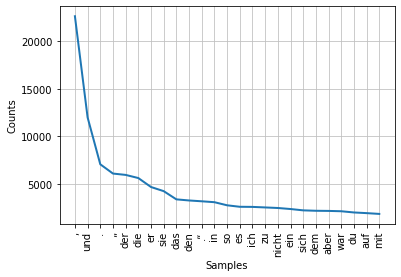

In [8]:
# plot the distribution of the top 25 most common tokens
grimm_text.plot(25)

## 2. Bereinigung des Vokabulars

In [9]:
# We create a helper function to create a Text object from a list of tokens
# the function print the number of tokens in the vocabulary and plots the 25 most common tokens


def summary(tokens):
    text = nltk.Text(tokens)
    print("Number of unique tokens:", len(text.vocab()))
    text.plot(25)

Number of unique tokens: 17086


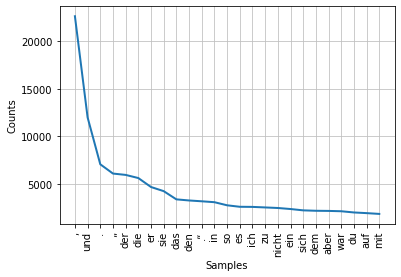

In [10]:
# We run the helper function on the tokens in the corpus
summary(tokens)

Number of unique tokens: 16097


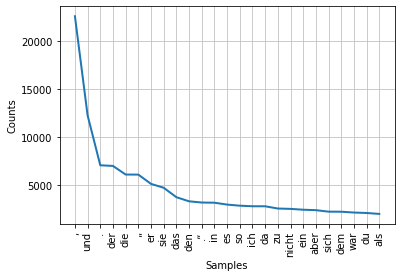

In [11]:
# we create a new list of lowercased tokens
# e.g. "Acht" -> "acht"
# we have fewer tokens in the vocabulary
tokens_lowercase = [token.lower() for token in tokens]
summary(tokens_lowercase)

In [12]:
# we download the stopwords lists using nltk
nltk.download("stopwords", quiet=True)

True

In [13]:
# a stopword is a word that occurs frequently in a language
# a stopword adds little to the understanding of a text and is often filtered out in text processing
# see: https://en.wikipedia.org/wiki/Stop_word

# example for german stopwords: "der", "die", "das", ...
german_stopwords = set(nltk.corpus.stopwords.words("german"))
# german_stopwords

Number of unique tokens: 15877


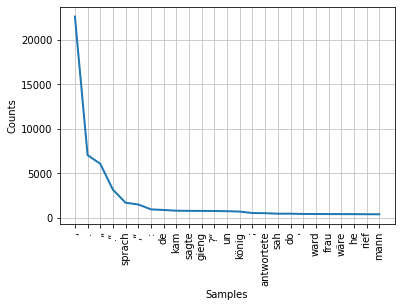

In [14]:
# we filter out stopwords from the wordlist
# we have fewer tokens in the vocabulary
# by comparing the plots we see, that "und", "der", "die" are gone
tokens_lowercase_no_stopwords = [
    token for token in tokens_lowercase if not token in german_stopwords
]
summary(tokens_lowercase_no_stopwords)

In [15]:
print("König".isalpha())
print("1".isalpha())
print(",".isalpha())
# depending on your analysis, you might want to keep compound words in the vocabulary
# in the fairytale corpus there are no compund words
print("Albrecht-Dürer-Straße".isalpha())

True
False
False
False


Number of unique tokens: 15830


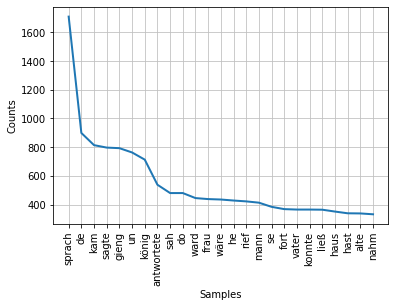

In [16]:
# we filter out punctuation, by using the method isalpha()
# we have fewer tokens in the vocabulary
# by comparing the plots we see, that ",", ".", "''" are gone
tokens_lowercase_no_stopwords_punctutation = [
    token for token in tokens_lowercase_no_stopwords if token.isalpha()
]
summary(tokens_lowercase_no_stopwords_punctutation)

In [17]:
# display the counts of the most common 25 tokens
nltk.Text(tokens_lowercase_no_stopwords_punctutation).vocab().most_common(25)

[('sprach', 1710),
 ('de', 899),
 ('kam', 814),
 ('sagte', 797),
 ('gieng', 793),
 ('un', 763),
 ('könig', 713),
 ('antwortete', 538),
 ('sah', 480),
 ('do', 480),
 ('ward', 445),
 ('frau', 438),
 ('wäre', 435),
 ('he', 428),
 ('rief', 422),
 ('mann', 413),
 ('se', 384),
 ('fort', 368),
 ('vater', 365),
 ('konnte', 365),
 ('ließ', 364),
 ('haus', 351),
 ('hast', 339),
 ('alte', 338),
 ('nahm', 332)]

## 3. Part-of-speech(PoS)-Tagging mit dem HanoverTagger

vgl.
- Paper: Wartena, Christian. A Probabilistic Morphology Model for German Lemmatization. 2019, p. 409 KB. DOI.org (Datacite), https://doi.org/10.25968/OPUS-1527.
- Code: https://github.com/wartaal/HanTa
- Demo-Notebook: https://github.com/wartaal/HanTa/blob/master/Demo.ipynb

In [18]:
# load german language model
tagger = ht.HanoverTagger("morphmodel_ger.pgz")

The tagger requires a sentence a tokenized sentence (sequence of strings). With the method tag_sent() you can get the lemma and PoS of a token.

In [19]:
# Example of PoS tagging a demo sentence.
sentence = "Es war einmal ein König, der hatte eine Frau mit goldenen Haaren."
tokens = nltk.word_tokenize(sentence, language="german")

lemmata = tagger.tag_sent(tokens, taglevel=1)
lemmata

[('Es', 'es', 'PPER'),
 ('war', 'sein', 'VAFIN'),
 ('einmal', 'einmal', 'ADV'),
 ('ein', 'ein', 'ART'),
 ('König', 'König', 'NN'),
 (',', '--', '$,'),
 ('der', 'der', 'PRELS'),
 ('hatte', 'haben', 'VAFIN'),
 ('eine', 'eine', 'ART'),
 ('Frau', 'Frau', 'NN'),
 ('mit', 'mit', 'APPR'),
 ('goldenen', 'golden', 'ADJA'),
 ('Haaren', 'Haar', 'NN'),
 ('.', '--', '$.')]

In [20]:
# Example of PoS tagging a few sentences from the fairytale corpus.
for sentence in fairytale_corpus_reader.sents()[:5]:
    print("|".join(sentence))
    lemmata = tagger.tag_sent(sentence, taglevel=1)
    # filter lemmata from pos-tagged sentence by PoS tag "NN" (noun)
    # get the lemma of the token ("Haar" instead of "Haaren")
    nouns = [lemma[1] for lemma in lemmata if lemma[2] == "NN"]
    print(nouns)
    print()

Es|war|einmal|ein|König|,|der|hatte|eine|Frau|mit|goldenen|Haaren|,|und|sie|war|so|schön|,|daß|sich|ihres|Gleichen|nicht|mehr|auf|Erden|fand|.
['König', 'Frau', 'Haar', 'Gleiche', 'Erde']

Es|geschah|,|daß|sie|krank|lag|,|und|als|sie|fühlte|daß|sie|bald|sterben|würde|,|rief|sie|den|König|und|sprach|„|wenn|du|nach|meinem|Tode|dich|wieder|vermählen|willst|,|so|nimm|keine|,|die|nicht|eben|so|schön|ist|,|als|ich|bin|,|und|die|nicht|solche|goldene|Haare|hat|,|wie|ich|habe|;|das|mußt|du|mir|versprechen|.“|Nachdem|es|ihr|der|König|versprochen|hatte|,|that|sie|die|Augen|zu|und|starb|.
['König', 'Tod', 'Haar', 'König', 'Auge']

Der|König|war|lange|Zeit|nicht|zu|trösten|und|dachte|nicht|daran|,|eine|zweite|Frau|zu|nehmen|.
['König', 'Zeit', 'Frau']

Endlich|sprachen|seine|Räthe|„|es|geht|nicht|anders|,|der|König|muß|sich|wieder|vermählen|,|damit|wir|eine|Königin|haben|.“|Nun|wurden|Boten|weit|und|breit|umhergeschickt|,|eine|Braut|zu|suchen|,|die|an|Schönheit|der|verstorbenen|Königin|ganz|gleich|

In [21]:
# note: this cell's operation can take some time, depending on your machine
# get only nouns from fairytale corpus
all_nouns = []
for i, sentence in enumerate(fairytale_corpus_reader.sents()):
    lemmata = tagger.tag_sent(sentence, taglevel=1)
    nouns = [lemma[1] for lemma in lemmata if lemma[2] == "NN"]
    all_nouns.extend(nouns)

In [22]:
all_nouns[:25]

['König',
 'Frau',
 'Haar',
 'Gleiche',
 'Erde',
 'König',
 'Tod',
 'Haar',
 'König',
 'Auge',
 'König',
 'Zeit',
 'Frau',
 'König',
 'Königin',
 'Bote',
 'Braut',
 'Schönheit',
 'Königin',
 'Welt',
 'Haar',
 'Bote',
 'Sache',
 'König',
 'Tochter']

Number of unique tokens: 3965


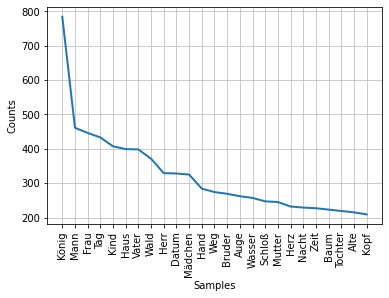

In [23]:
# we use only tokens, tagged by the HannoverTagger as nouns
# the results look promising, but use this carefully, because the language model is not trained on the fairytales language and grammar
summary(all_nouns)

In [24]:
import session_info

session_info.show()